In [1]:
pwd

'C:\\Users\\LENOVO\\MITx SC0 Supply Chain Analytics\\Module2_statistics'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
#use row 2 in csv as header, read 50 rows only after row 2, read columns 1 - 4 in csv only
df = pd.read_csv("ZippyBright_data.csv", header = 1, nrows = 50, usecols = [0,1,2,3])

In [9]:
df.head()

,Week #,Store A,Store B,Store C
0,1,1,4,7
1,2,5,2,8
2,3,3,0,7
3,4,2,1,6
4,5,3,2,7


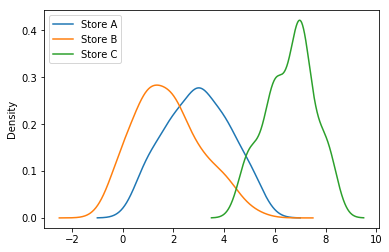

In [14]:
df[['Store A','Store B','Store C']].plot.kde()

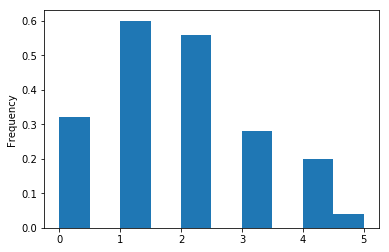

In [16]:
df['Store B'].plot.hist(density = True)

In [17]:
np.histogram(df['Store B'])

(array([ 8,  0, 15,  0, 14,  0,  7,  0,  5,  1], dtype=int64),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]))

In [21]:
len(df['Store B'])

50

In [22]:
7/50


0.14

In [35]:
np.histogram(df['Store C'], bins = 3, density = True)

(array([0.14, 0.28, 0.58]), array([5., 6., 7., 8.]))

In [29]:
len(df['Store C'])

50

In [30]:
14/50

0.28

In [37]:
n = pd.Series([51, 53, 47, 51, 51, 51, 49, 52, 53, 52])

In [38]:
n.mean()

51.0

In [39]:
n.median()

51.0

In [41]:
n.mode()

0    51
dtype: int64

In [2]:
from scipy.stats import poisson

In [44]:
#poisson distribution with x = 2 and lamda = 1.3
poisson.pmf(2,1.3)

0.23028936511374068

In [55]:
#cumulative poisson distribution with x <=3 and lamda = 2.195
poisson.cdf(3,2.195)

0.8203347192525291

In [57]:
x = np.array([5, 9, 8, 10, 8, 10, 6, 5, 11, 6, 10, 11])

In [61]:
np.median(x)

8.5

In [3]:
from scipy import stats

In [66]:
stats.mode(x)

ModeResult(mode=array([10]), count=array([3]))

In [68]:
np.max(x) - np.min(x)

6

In [69]:
np.var(x)

4.6875

In [70]:
np.std(x)

2.165063509461097

In [82]:
prod = pd.read_csv("storeproduction.csv")

In [94]:
prod = prod.append({'Day': 'Sunday', 'Demand':0}, ignore_index = True)

In [95]:
prod

,Day,Demand
0,Monday,1
1,Wednesday,3
2,Thursday,4
3,Friday,4
4,Monday,1
5,Wednesday,4
6,Thursday,2
7,Friday,4
8,Tuesday,3
9,Wednesday,3


In [107]:
#What is the median of the daily demand for this product on business days?
prod[(prod['Day'] != 'Sunday') & (prod['Day'] != 'Saturday')]['Demand'].median()

3.0

In [122]:
from scipy.stats import randint

#Some amusement parks in Florida are designed to have several regions that are accessible only by having 
#a ticket for a specific time slot. This strategy not only helps boost ticket sales for the park, but 
#also helps to regulate the volume of visitors at any given time. One of the popular visitor sites is 
#Future Land, or a futuristic region that features rides with robots and rocket ships. 
#The number of visitors in this region follows a discrete uniform distribution ranging from 801 to 1300.

In [136]:
#Given this distribution, what is the probability that the number of visitors 
#in this region will be in the 900s (from 900 to 999)?

visit900to999 = randint.cdf(1000,801,1301) - randint.cdf(900,801,1301) 
print(visit900to999)

0.2


In [128]:
#What is the probability that Future Land will have less than 1150 visitors?
lessthan1150 = randint.cdf(1149, 801, 1301)
print(lessthan1150)

0.20040080160320642

In [140]:
#A sari-sari store is a small convenience store owned and managed by a regular homeowner 
#in the Philippines. These traditional convenience stores are very informal and sell 
#consumer products in small quantities. Although these sari-sari stores can serve several 
#households within an area, their daily sales tend to be slow. Some sari-sari stores open 
#as early as 5 AM and close around 7 PM. The number of customers visiting a sari-sari 
#store in a single day can be described by a Poisson distribution with a  λ=5 .

#Given this distribution, what is the probability that 4 customers that will stop by a single sari-sari store today?

poisson.pmf(4,5)

0.17546736976785063

In [141]:
#What is the probability that a sari-sari store will have more than 6 customers?

1 - poisson.cdf(6,5)

0.2378165370270613

In [146]:
sales = pd.read_csv("DCsales.csv", header = 1, usecols = [0,1,2,3])

In [148]:
sales = sales.dropna(how = "all")

In [149]:
sales.head()

,Week #,East,Center,West
0,1.0,3595.0,2551.0,2088.0
1,2.0,3011.0,0.0,1495.0
2,3.0,2994.0,2481.0,578.0
3,4.0,3576.0,0.0,2241.0
4,5.0,3697.0,805.0,1498.0


In [150]:
sales = sales.astype({'East':int,'Center':int,'West':int})

In [159]:
#75th percentile of the dataframe
sales['Center'].quantile(q = .75)

2342.25

In [164]:
sales['Center'].std() / sales['Center'].mean() 

1.1586455089061523

In [185]:
#The Pizza Factory is a small town pizza parlor. Their oven is not consistent 
#in the time it takes to properly cook pizzas. The distribution of pizza cook time is 
#uniformly distributed between 600 seconds (10 minutes) and 720 seconds (12 minutes).

pizzatime = stats.uniform(600,720-600)

In [186]:
#What is the mean cook time for a pizza?
pizzatime.mean()

660.0

In [181]:
#What is the variance of cook time for a pizza?
pizzatime.var()

1200.0

In [183]:
#What is the probability that a pizza will take less than 840 seconds to cook properly?
pizzatime.cdf(840)

1.0

In [184]:
#What is the probability that a pizza will take more than 620 seconds and less than 700 seconds to cook properly?
pizzatime.cdf(700) - pizzatime.cdf(620)

0.6666666666666667

In [208]:
#The Pizza Factory is a small town pizza parlor. Their old oven was not 
#consistent in the time it took to properly cook pizzas. Recently, they 
#purchased a new oven to cook their pizza faster and more consistently. 
#The new oven cooks pizzas with a standard deviation of 20 seconds.

normal = stats.norm(0, 20)

In [231]:
#Without knowing the mean, what is the probability that a pizza will be cooked within +/-20 seconds of the mean?

(normal.cdf(0) - normal.cdf(20))*2

-0.6826894921370859

In [232]:
#Without knowing the mean, what is the probability that a pizza will be cooked before a time of 10 seconds plus the mean?
# t = mean + 10

normal.cdf(10)

0.6914624612740131

In [219]:
#After a few weeks with the new oven, the pizza factory finds out that the mean cook time
#for pizza is 480 seconds (8 minutes). The standard deviation of cook time is still 20 seconds.

pizzanormal = stats.norm(480,20)

In [221]:
#What is the probability that a pizza takes more than 500 seconds to cook?
1-pizzanormal.cdf(500)

0.15865525393145707

In [222]:
#What is the probability that a pizza takes less than 520 seconds to cook?
pizzanormal.cdf(520)

0.9772498680518208

In [224]:
#What is the probability that a pizza takes more than 520 seconds to cook or less than 460 seconds to cook?
1-pizzanormal.cdf(520) + pizzanormal.cdf(460)

0.18140538587963628

In [43]:
from scipy.stats import triang
from random import random, uniform

#For American Nobake Cookies, Renee knows that she always sells more than 145 and never more than 210. 
#She always feels like she sells about 190. Renee wants to satisfy all of her customers 89% of the time. 
#Using the triangle distribution, how many American Nobake Cookies should she prepare every day?

c = (190-145)/(210-145)

treats = triang(c,loc=145,scale=(210-145))

In [44]:
treats.ppf(0.89)

198.0417392568986

In [41]:
#With Turkish Delights, Renee knows that she always sells more than 110 and never more than 160. 
#She always feels like she sells about 130. Renee normally makes 145 Turkish Delights. 
#Using the triangle distribution, how often would she meet all of her demand?

cturk = (130-110)/(160-110)
turkish = triang(cturk,110,(160-110))

turkish.cdf(145)

0.8499999999999999

In [46]:
#With Indian Phirni, Renee knows that she always sells at least 85 bowls and never more than 130. 
#She normally sells around 110. Using the triangle distribution, 
#how much Indian Phirni should Renee expect to sell in a given day?

cind = (110-85)/(130-85)
indian = triang(cind,85,130-85)

indian.mean()

108.33333333333333

In [47]:
indian.var()

84.72222222222221

In [51]:
curd = stats.norm(70,12.247)
curd.cdf(90)

0.9487710740632638

In [52]:
1-curd.cdf(65)

0.6584597909638211

In [55]:
cmode = (70-40)/(100-40)
cscale = 100-40
curdt = stats.triang(cmode, 40, cscale)

In [58]:
1-curdt.cdf(65)

0.6527777777777777

In [59]:
#KiaraDT is a brand of shoes which has over 100 stores across the world. You are 
#recently appointed as their head of supply chain management. As your first task, 
#you plan to study the monthly demand of their popular black pumps across all the 
#stores. You have a sample data with demands from over 100 stores and you realize 
#that per store, the demand is normally distributed with an average demand of 50 
#and standard deviation of 20. Recalling your learnings from SC0x, you consider 
#to stock 65 units.


kiara = stats.norm(50,20)

In [79]:
#What is the probability that you will meet the demand if you stock k=65 units?
kiara.cdf(65)

0.7733726476231317

In [63]:
#What is the probability of a stock out?
1-kiara.cdf(65)

0.22662735237686826

In [90]:
#Recall the standard normal distribution. What is the corresponding z-value for the inventory level k=65?
z = 15/20


In [91]:
#Using the standard unit normal form of the distribution, is the probability that the demand is met, the same as in part a?
kiarastd = stats.norm(0,1)
kiarastd.cdf(z)

0.7733726476231317

In [83]:
kiara.ppf(0.95)

82.89707253902944

In [84]:
kiarastd.ppf(0.95)

1.6448536269514722

In [87]:
#Considering the brand value of KiaraDT, you understand that running out of stock 
#might affect the brand image of the company. Hence, you decide to stock enough to meet 90% of the demand.

#How many units would you need to stock?
1-kiara.cdf(90)

0.02275013194817921

In [86]:
#What is the probability that your demand is less than your stock in 
#warehouse and in-store combined, but greater than the in-store stock?

kiara.cdf(90)-kiara.cdf(60)

0.2857874067778077

In [88]:
#What is the overall probability that you will meet the demand?
kiara.cdf(90)

0.9772498680518208

In [100]:
1 - poisson.cdf(4,5)

0.5595067149347874